In [36]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [37]:
#load data
data = pd.read_csv("..\\..\\..\\Data\\Month\\sand500_MinuteToMonth.csv")

In [38]:
data.head()

,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol
0,2010-01-31 23:59:59.999999999,2010-01,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0
1,2010-02-28 23:59:59.999999999,2010-02,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0
2,2010-03-31 23:59:59.999999999,2010-03,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0
3,2010-04-30 23:59:59.999999999,2010-04,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0
4,2010-05-31 23:59:59.999999999,2010-05,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0


In [39]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Close = data.Close.astype(float) # Here price is equal to close
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)

In [40]:
special_data = pd.DataFrame(data)

In [41]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [42]:
#change indexes
# Учти это чтобы не было затупов в других местах!
# special_data.set_index('Date', inplace = True)

In [43]:
data.head(10)

,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol,Timestamp
0,2010-01-31 23:59:59.999999999,2010-01-01,SANDP-500,1,1073.72,1073.82,1073.72,1073.82,0,2010-01
1,2010-02-28 23:59:59.999999999,2010-02-01,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02
2,2010-03-31 23:59:59.999999999,2010-03-01,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03
3,2010-04-30 23:59:59.999999999,2010-04-01,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04
4,2010-05-31 23:59:59.999999999,2010-05-01,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05
5,2010-06-30 23:59:59.999999999,2010-06-01,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06
6,2010-07-31 23:59:59.999999999,2010-07-01,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0,2010-07
7,2010-08-31 23:59:59.999999999,2010-08-01,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0,2010-08
8,2010-09-30 23:59:59.999999999,2010-09-01,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0,2010-09
9,2010-10-31 23:59:59.999999999,2010-10-01,SANDP-500,1,1183.26,1183.26,1183.26,1183.26,0,2010-10


In [44]:
special_data.head(10)

,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol,Timestamp
0,2010-02-28 23:59:59.999999999,2010-02-01,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02
1,2010-03-31 23:59:59.999999999,2010-03-01,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03
2,2010-04-30 23:59:59.999999999,2010-04-01,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04
3,2010-05-31 23:59:59.999999999,2010-05-01,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05
4,2010-06-30 23:59:59.999999999,2010-06-01,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06
5,2010-07-31 23:59:59.999999999,2010-07-01,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0,2010-07
6,2010-08-31 23:59:59.999999999,2010-08-01,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0,2010-08
7,2010-09-30 23:59:59.999999999,2010-09-01,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0,2010-09
8,2010-10-31 23:59:59.999999999,2010-10-01,SANDP-500,1,1183.26,1183.26,1183.26,1183.26,0,2010-10
9,2010-11-30 23:59:59.999999999,2010-11-01,SANDP-500,1,1181.77,1181.96,1181.77,1181.81,0,2010-11


In [45]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index,new_date
0,2010-02-28 23:59:59.999999999,2010-02-01,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02,1104.48,1104.48
1,2010-03-31 23:59:59.999999999,2010-03-01,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03,1169.37,1169.37
2,2010-04-30 23:59:59.999999999,2010-04-01,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04,1188.06,1188.06
3,2010-05-31 23:59:59.999999999,2010-05-01,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05,1089.41,1089.41
4,2010-06-30 23:59:59.999999999,2010-06-01,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06,1031.08,1031.08


In [46]:
import datetime

special_data.loc[0, 'new_index'] = 1262563200
special_data.loc[0, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[0, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.loc[i, 'new_index'] = special_data.loc[i - 1, 'new_index'] + 86400
        special_data.loc[i, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[i, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2010-01-04 07:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [47]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [48]:
special_data.head(20)

,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index
new_date,,,,,,,,,,,
2010-01-04 07:00:00,2010-02-28 23:59:59.999999999,2010-02-01,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02,1.262563e+09
2010-01-05 07:00:00,2010-03-31 23:59:59.999999999,2010-03-01,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03,1.262650e+09
2010-01-06 07:00:00,2010-04-30 23:59:59.999999999,2010-04-01,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04,1.262736e+09
2010-01-07 07:00:00,2010-05-31 23:59:59.999999999,2010-05-01,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05,1.262822e+09
2010-01-08 07:00:00,2010-06-30 23:59:59.999999999,2010-06-01,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06,1.262909e+09
2010-01-09 07:00:00,2010-07-31 23:59:59.999999999,2010-07-01,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0,2010-07,1.262995e+09
2010-01-10 07:00:00,2010-08-31 23:59:59.999999999,2010-08-01,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0,2010-08,1.263082e+09
2010-01-11 07:00:00,2010-09-30 23:59:59.999999999,2010-09-01,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0,2010-09,1.263168e+09
2010-01-12 07:00:00,2010-10-31 23:59:59.999999999,2010-10-01,SANDP-500,1,1183.26,1183.26,1183.26,1183.26,0,2010-10,1.263254e+09


In [49]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

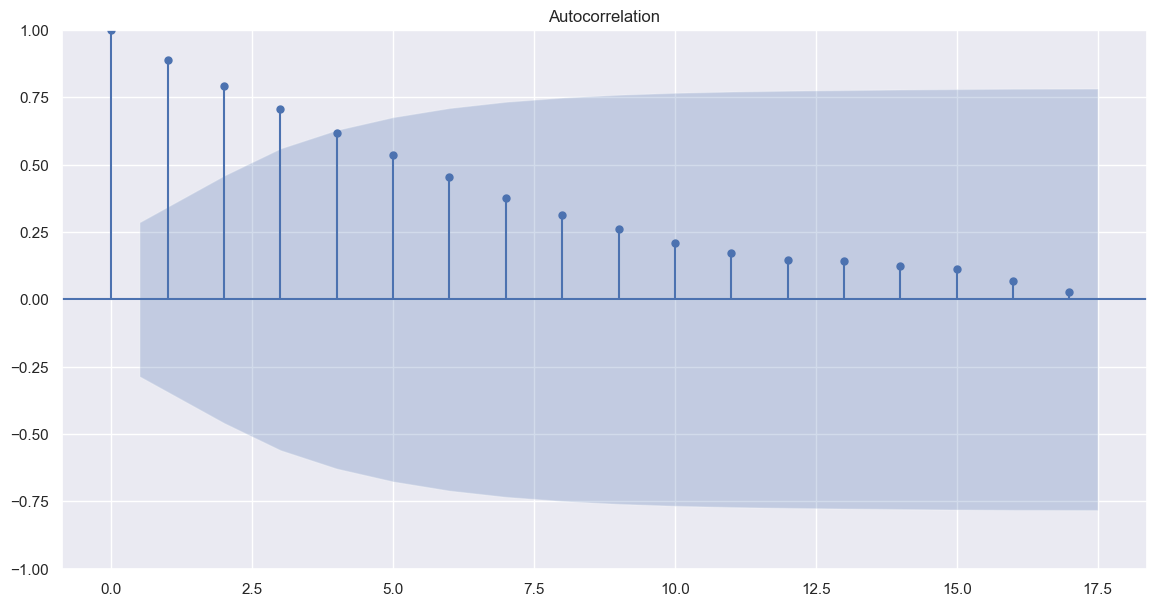

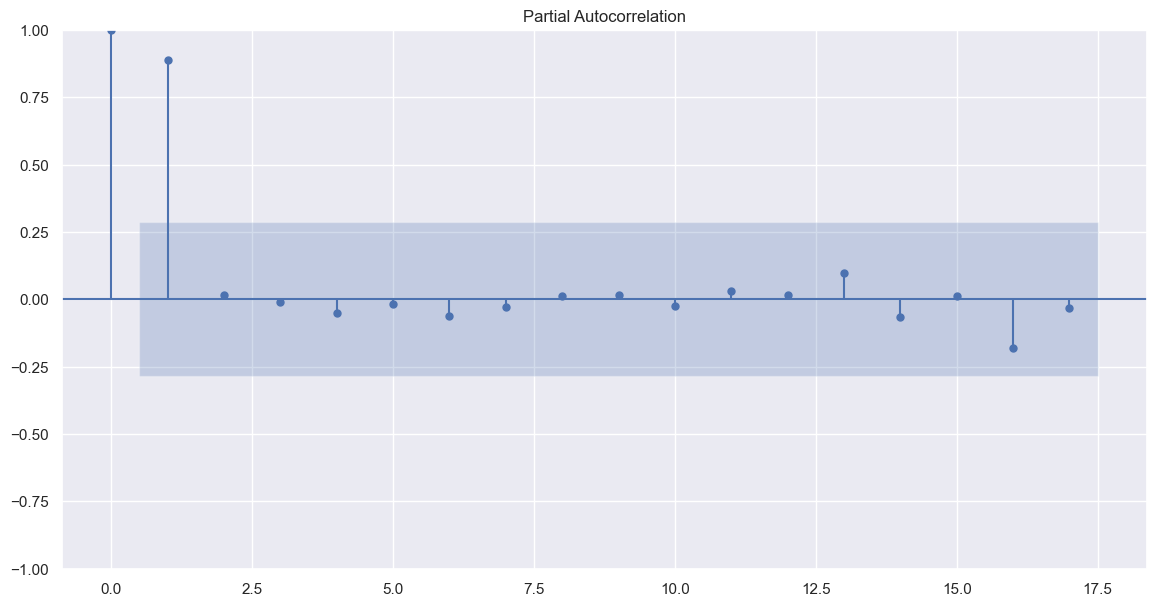

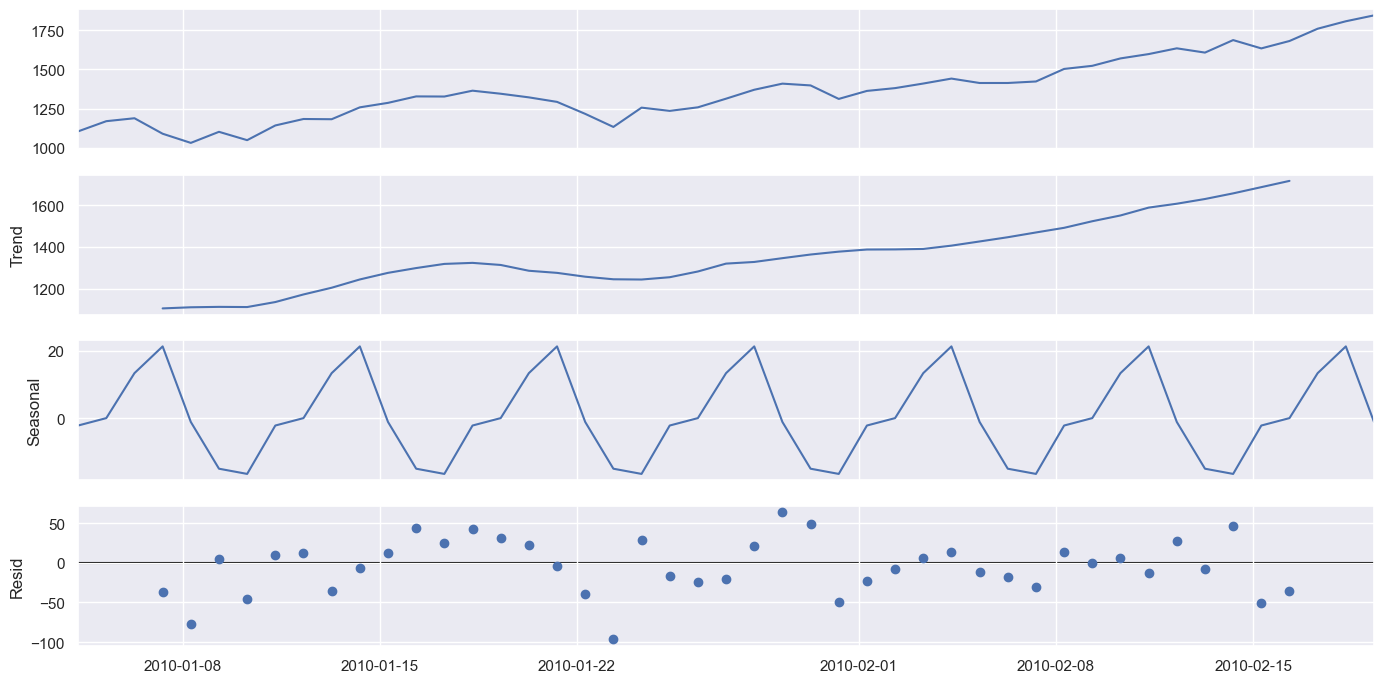

0.3034065972464292
0.9775002403019155


In [50]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

In [51]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

ForecastError: Before calling a model, please make sure you have generated future dates by calling generate_future_dates(), set_last_future_date(), or ingest_Xvars_df(use_future_dates=True).

In [52]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [53]:
adf_test(special_data['Close'])

1. ADF :  0.3034065972464292
2. P-Value :  0.9775002403019155
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 46
5. Critical Values :
	 1% :  -3.5812576580093696
	 5% :  -2.9267849124681518
	 10% :  -2.6015409829867675


In [54]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -245.859
Date:                Mon, 27 Nov 2023   AIC                            495.717
Time:                        22:05:12   BIC                            499.375
Sample:                    01-04-2010   HQIC                           497.087
                         - 02-19-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.0620      7.940      2.023      0.043       0.500      31.624
sigma2      2569.9270    630.557      4.076      0.000    1334.058    3805.796
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.70   Prob(JB):                         0.43
Heteroskedasticity (H):               0.59   Skew:                            -0.43
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
data_len = len(special_data)

In [56]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [57]:
train_data = special_data.iloc[:int(train_len)]

In [58]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [59]:
test_data.Close

new_date
2010-02-05 07:00:00    1412.58
2010-02-06 07:00:00    1412.65
2010-02-07 07:00:00    1422.23
2010-02-08 07:00:00    1502.17
2010-02-09 07:00:00    1522.01
2010-02-10 07:00:00    1569.19
2010-02-11 07:00:00    1596.73
2010-02-12 07:00:00    1633.41
2010-02-13 07:00:00    1606.28
2010-02-14 07:00:00    1685.92
2010-02-15 07:00:00    1632.97
2010-02-16 07:00:00    1680.10
2010-02-17 07:00:00    1758.37
2010-02-18 07:00:00    1805.81
2010-02-19 07:00:00    1843.33
Name: Close, dtype: float64

In [60]:
train_data

,LastDayOfMonth,Date,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index
new_date,,,,,,,,,,,
2010-01-04 07:00:00,2010-02-28 23:59:59.999999999,2010-02-01,SANDP-500,1,1104.48,1104.48,1104.48,1104.48,0,2010-02,1.262563e+09
2010-01-05 07:00:00,2010-03-31 23:59:59.999999999,2010-03-01,SANDP-500,1,1169.37,1169.37,1169.37,1169.37,0,2010-03,1.262650e+09
2010-01-06 07:00:00,2010-04-30 23:59:59.999999999,2010-04-01,SANDP-500,1,1188.06,1188.06,1188.06,1188.06,0,2010-04,1.262736e+09
2010-01-07 07:00:00,2010-05-31 23:59:59.999999999,2010-05-01,SANDP-500,1,1089.41,1089.41,1089.41,1089.41,0,2010-05,1.262822e+09
2010-01-08 07:00:00,2010-06-30 23:59:59.999999999,2010-06-01,SANDP-500,1,1031.03,1031.08,1031.03,1031.08,0,2010-06,1.262909e+09
2010-01-09 07:00:00,2010-07-31 23:59:59.999999999,2010-07-01,SANDP-500,1,1101.60,1101.60,1101.59,1101.60,0,2010-07,1.262995e+09
2010-01-10 07:00:00,2010-08-31 23:59:59.999999999,2010-08-01,SANDP-500,1,1048.86,1048.86,1048.46,1048.46,0,2010-08,1.263082e+09
2010-01-11 07:00:00,2010-09-30 23:59:59.999999999,2010-09-01,SANDP-500,1,1142.50,1142.50,1142.10,1142.10,0,2010-09,1.263168e+09
2010-01-12 07:00:00,2010-10-31 23:59:59.999999999,2010-10-01,SANDP-500,1,1183.26,1183.26,1183.26,1183.26,0,2010-10,1.263254e+09


In [85]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True, m = 12)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=340.023, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=342.000, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=341.998, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=339.221, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.247 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -168.610
Date:                Mon, 27 Nov 2023   AIC                            339.221
Time:                        22:41:08   BIC                            340.655
Sample:                    01-04-2010   HQIC                           339.688
                         - 02-04-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3103.8012    996.857      3.114      0.002    1149.998    5057.605
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.87   Prob(JB):                         0.65
Heteroskedasticity (H):               0.49   Skew:                            -0.30
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

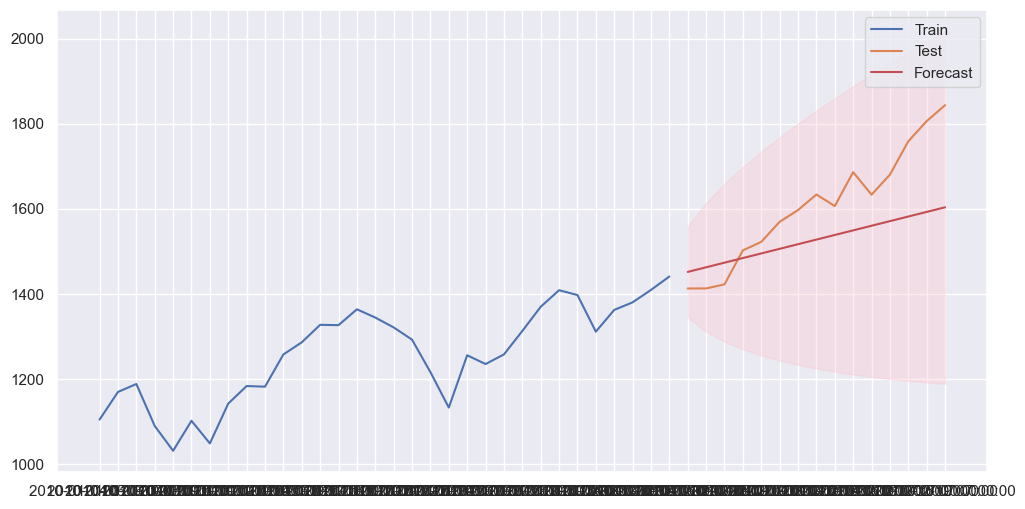

In [74]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [63]:
forecast

2010-02-05 07:00:00    1451.514839
2010-02-06 07:00:00    1462.359677
2010-02-07 07:00:00    1473.204516
2010-02-08 07:00:00    1484.049355
2010-02-09 07:00:00    1494.894194
2010-02-10 07:00:00    1505.739032
2010-02-11 07:00:00    1516.583871
2010-02-12 07:00:00    1527.428710
2010-02-13 07:00:00    1538.273548
2010-02-14 07:00:00    1549.118387
2010-02-15 07:00:00    1559.963226
2010-02-16 07:00:00    1570.808065
2010-02-17 07:00:00    1581.652903
2010-02-18 07:00:00    1592.497742
2010-02-19 07:00:00    1603.342581
Freq: D, dtype: float64

No frequency information was provided, so inferred frequency D will be used.
No frequency information was provided, so inferred frequency D will be used.
Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting MA parameters found. Using zeros as starting parameters.
Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.


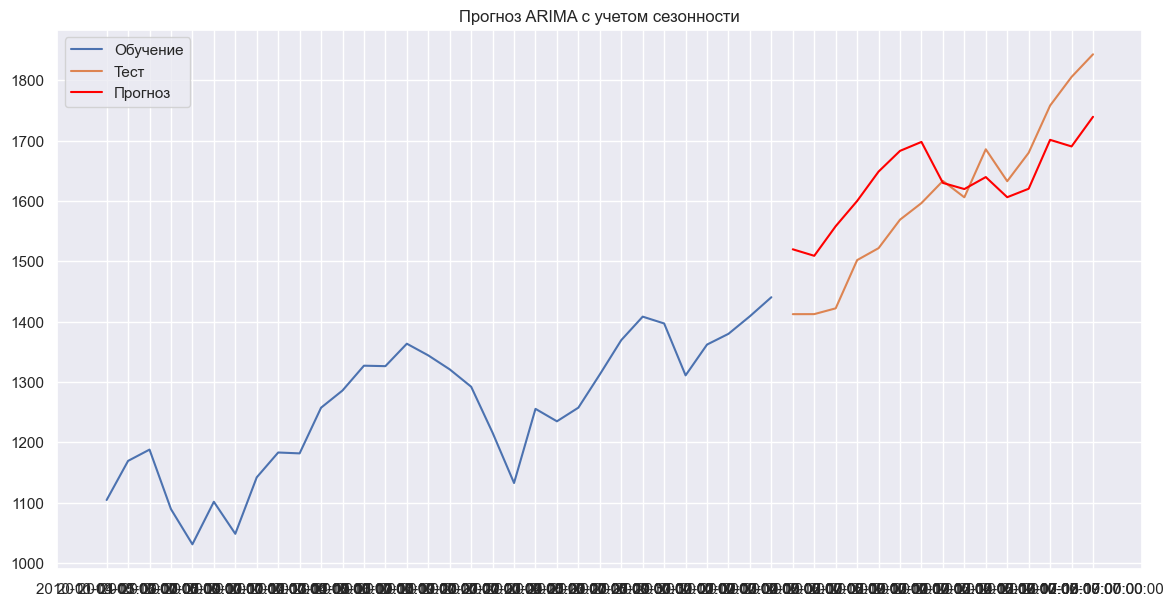

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (2, 1, 1)  # параметры ARIMA
seasonal_order = (1, 1, 2, 12)

# Создание и обучение модели
model = SARIMAX(train_data.Close, order=order, seasonal_order=seasonal_order)
results = model.fit(disp = False)

# Прогнозирование на тестовой выборке
forecast = results.get_forecast(steps=len(test_data))
predicted_mean = forecast.predicted_mean

# Визуализация результатов
plt.plot(train_data.Close, label='Обучение')
plt.plot(test_data.Close, label='Тест')
plt.plot(test_data.index, predicted_mean.values, label='Прогноз', color='red')
plt.legend()
plt.title('Прогноз ARIMA с учетом сезонности')
plt.show()